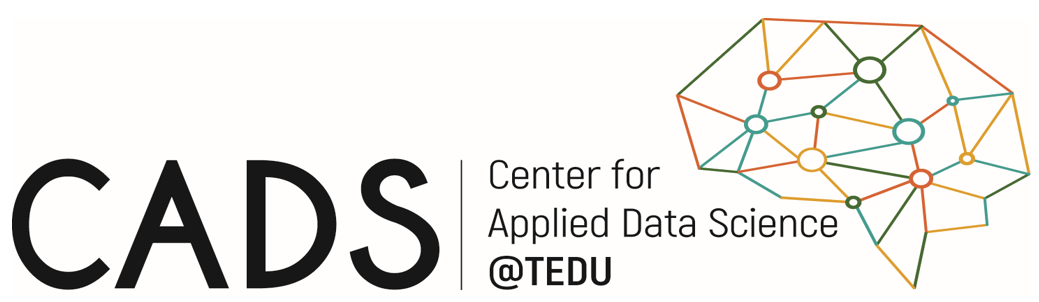

***

# Otokodlayıcılar

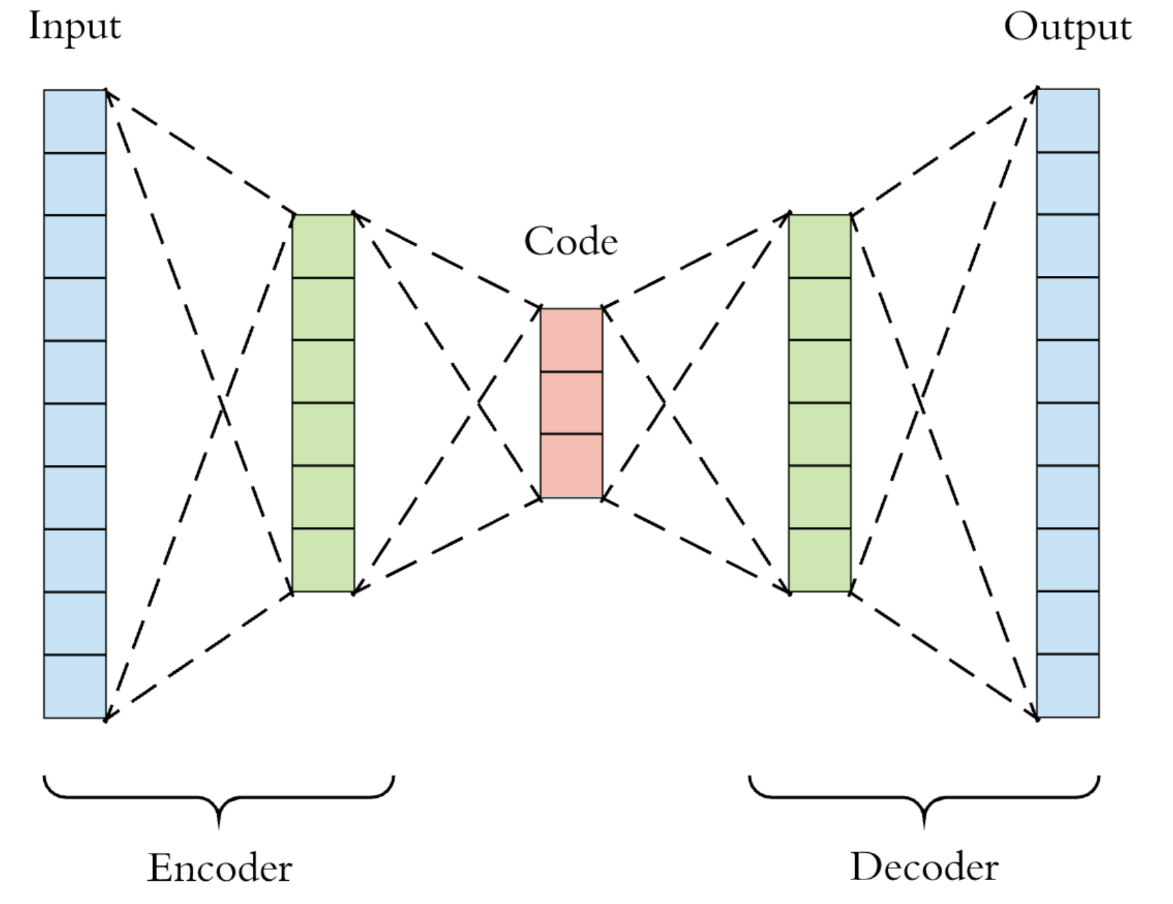

Klasik derin öğrenme modellerinden farklı olarak 3 farklı komponent karşımıza çıkıyor. Bunlar:

**Kodlayıcı:** Eğitim veri setindeki değişkenlerin ilişkisini kodlayan (çözen) ve bu bilgileri kod bloğuna aktaran.

**Kod:** Bu bilgileri kod çözücüye aktaran katman. Bir nevi boyut indirgeyen katman.

**Kod Çözücü:** Bilginin ne olduğunu anlayan katmanlar. 

## İlgili Kütüphaneler

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from tensorflow.keras.datasets import mnist

In [7]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

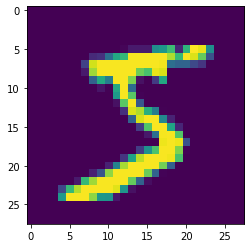

In [8]:
plt.imshow(X_train[0])

In [9]:
X_train.shape

(60000, 28, 28)

## Basit Otokodlayıcı

In [10]:
# Veri setlerimizi standardize edelim
X_train = X_train/255
X_test = X_test/255

In [ ]:
# Resimlerimizi yeniden yapılandıralım. Kompleks 3 boyutlu yapıdan 2 boyutlu yapıya geçiyoruz.
X_train = X_train.reshape((len(X_train), 28*28))
X_test = X_test.reshape((len(X_test), 28*28))

In [ ]:
#İlgili kütüphanelerden ilgili fonksiyonlar
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input, Reshape

Otokodlayıcı modeli oluştururken bir nevi aynalama yapıyoruz. Kod kısmı ayna görevi görüyor. Kodlayıcı aynaya bakan kod çözücü ise aynadan yansıyan gibi düşünebiliriz.

In [ ]:
#Resimlerimizin yapısını 784 olacak şekilde düzenlemiştik. Girdi bu şekilde olmalı.
input_img = Input(shape = (784,))
#İlk kodlayıcı ve aynı zamanda kod katmanı
encoded = Dense(32, activation='relu')(input_img)
#İlk kod çözücü katmanı
decoded = Dense(784, activation='sigmoid')(encoded)
#Model
autoencoder = Model(input_img, decoded)

In [ ]:
#Eğer kod kısmından boyutu indirgenmiş özellikleri (feature) almak istersek
encoder = Model(input_img, encoded)

In [ ]:
#Modelimizi derleyelim
autoencoder.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [ ]:
#Modelimizi eğitelim
autoencoder.fit(X_train, X_train, epochs = 50, validation_data=(X_test, X_test))

Epoch 1/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1604 - accuracy: 0.0111 - val_loss: 0.1119 - val_accuracy: 0.0106
Epoch 2/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1036 - accuracy: 0.0115 - val_loss: 0.0961 - val_accuracy: 0.0142
Epoch 3/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0959 - accuracy: 0.0111 - val_loss: 0.0936 - val_accuracy: 0.0117
Epoch 4/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0946 - accuracy: 0.0113 - val_loss: 0.0930 - val_accuracy: 0.0108
Epoch 5/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0942 - accuracy: 0.0119 - val_loss: 0.0928 - val_accuracy: 0.0124
Epoch 6/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0940 - accuracy: 0.0110 - val_loss: 0.0926 - val_accuracy: 0.0143
Epoch 7/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0938 - accuracy: 0.0113 - val_loss: 0.0924 - val_accuracy:

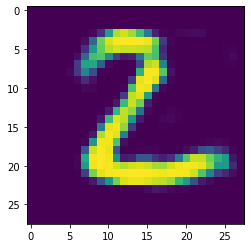

In [ ]:
#784'ten 32 özelliğe indirilen 2 sayısının resmi
plt.imshow(autoencoder.predict(X_test[[1]]).reshape((28,28)))

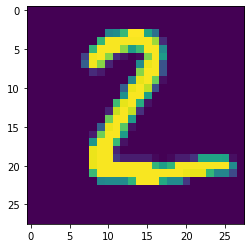

In [ ]:
#Orjinal 2 sayısının resmi
plt.imshow(X_test[1].reshape((28,28)))

Hiç fena değil. 2 sayısının boyutu 784'ten 32'ye indirilmiş hali de net şekilde belli oluyor.

## Derin Otokodlayıcı

In [ ]:
#Resim girdimizin şekli
input_img = Input(shape=(784,))
#İlk kodlayıcı katman
encoded = Dense(256, activation='relu')(input_img)
#İkinci kodlayıcı katman
encoded = Dense(128, activation='relu')(encoded)
#Üçüncü kodlayıcı katman
encoded = Dense(64, activation='relu')(encoded)
#Kod katmanı. Boyut indirgenmiş katman.
encoded = Dense(32, activation='relu')(encoded)

#İlk kod çözücü katmanı
decoded = Dense(64, activation='relu')(encoded)
#İkinci kod çözücü katmanı
decoded = Dense(128, activation = 'relu')(decoded)
decoded = Dense(256, activation='relu')(decoded)
#Üçüncü kod çözücü katmanı
decoded = Dense(784, activation='sigmoid')(decoded)
#Son kod çözücü katmanı. Tekrar boyutlandırma.
decoded = Reshape((784,))(decoded)
autoencoder = Model(input_img, decoded)

In [ ]:
autoencoder.compile(optimizer='adam', loss =  'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
autoencoder.fit(X_train, X_train, epochs = 30, validation_data=(X_test, X_test))

Epoch 1/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1560 - accuracy: 0.0120 - val_loss: 0.1182 - val_accuracy: 0.0099
Epoch 2/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1125 - accuracy: 0.0106 - val_loss: 0.1052 - val_accuracy: 0.0112
Epoch 3/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1036 - accuracy: 0.0127 - val_loss: 0.1006 - val_accuracy: 0.0116
Epoch 4/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0991 - accuracy: 0.0123 - val_loss: 0.0964 - val_accuracy: 0.0137
Epoch 5/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0957 - accuracy: 0.0139 - val_loss: 0.0937 - val_accuracy: 0.0122
Epoch 6/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0934 - accuracy: 0.0136 - val_loss: 0.0918 - val_accuracy: 0.0127
Epoch 7/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0917 - accuracy: 0.0136 - val_loss: 0.0905 - val_accuracy:

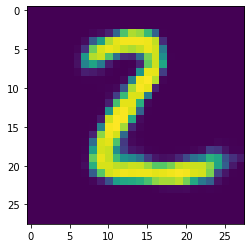

In [ ]:
plt.imshow(autoencoder.predict(X_test[[1]]).reshape((28,28)))

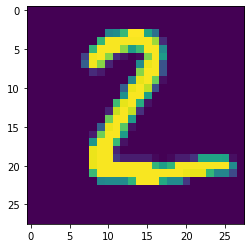

In [ ]:
plt.imshow(X_test[1].reshape((28,28)))

Bir önceki modele göre 32 özelliğe indirgenmiş 2 sayısının resmini daha da net bir şekilde  görebiliyoruz.

# Evrişimli Otokodlayıcı

Daha kompleks modeller kullanarak da otokodlayıcı mimarisi dizayn edebiliriz. Burada siyah beyaz resimlerden oluşan (1 kanallı) resimlere yönelik mimariyi görebilirsiniz.

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D

In [ ]:
#Resim girdimizin şekli
input_img = Input(shape=(28, 28, 1))
x = Conv2D(16, (3,3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2,2), padding='same')(x)
x = Conv2D(8, (3,3), activation='relu', padding='same')(x)
x = MaxPooling2D((2,2), padding='same')(x)
x = Conv2D(8, (3,3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

#Aynalama yaptığımız için kodlayıcıdaki MaxPooling katmanlarına karşın kod çözücüde UpSampling katmanlarını kullanıyoruz.
x = Conv2D(8, (3,3), activation = 'relu', padding = 'same')(encoded)
x = UpSampling2D((2,2))(x)
x = x = Conv2D(8, (3,3), activation = 'relu', padding = 'same')(x)
x = UpSampling2D((2,2))(x)
x = Conv2D(16, (3,3), activation = 'relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3,3), activation='sigmoid', padding='same')(x)
decoded = Reshape((28,28,1))(decoded)
autoencoder = Model(input_img, decoded)

In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
#784 olan resim şeklimizi siyah beyaz resim şekline getirelim
X_train=np.reshape(X_train, (len(X_train), 28, 28, 1))
X_test = np.reshape(X_test, (len(X_test), 28, 28, 1))

In [ ]:
autoencoder.fit(X_train, X_train, epochs = 30, validation_data=(X_test, X_test))

Epoch 1/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1543 - accuracy: 0.8032 - val_loss: 0.1170 - val_accuracy: 0.8072
Epoch 2/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1121 - accuracy: 0.8100 - val_loss: 0.1067 - val_accuracy: 0.8100
Epoch 3/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1059 - accuracy: 0.8112 - val_loss: 0.1028 - val_accuracy: 0.8113
Epoch 4/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1024 - accuracy: 0.8118 - val_loss: 0.0997 - val_accuracy: 0.8112
Epoch 5/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1000 - accuracy: 0.8122 - val_loss: 0.0979 - val_accuracy: 0.8112
Epoch 6/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0981 - accuracy: 0.8125 - val_loss: 0.0961 - val_accuracy: 0.8118
Epoch 7/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0965 - accuracy: 0.8128 - val_loss: 0.0944 - val_accuracy:

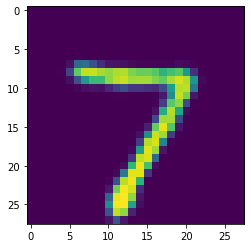

In [ ]:
plt.imshow(autoencoder.predict(X_test)[0].reshape((28,28)))

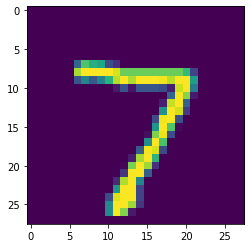

In [ ]:
plt.imshow(X_test[0].reshape((28,28)))

Çok daha net bir resim elde ettik.

# Resimlerden Gürültü Kaldırma

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
X_train = X_train / 255
X_test = X_test / 255
X_train = np.reshape(X_train, (len(X_train), 28, 28 , 1))
X_test = np.reshape(X_test, (len(X_test),28,28,1))

In [ ]:
#Resimlere gürültü ekleyelim
noise_factor = 0.5
X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape) 
X_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape) 

In [ ]:
X_train_noisy.shape

(60000, 28, 28, 1)

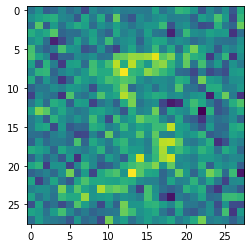

In [ ]:
#Buradaki 5 sayısını fark edebiliyor musunuz?
plt.imshow(X_train_noisy[0].reshape((28,28)))

In [ ]:
# Evrişimli otokodlayıcı modeli
input_img = Input(shape=(28, 28, 1))
x = Conv2D(32, (3,3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2,2), padding='same')(x)
x = Conv2D(32, (3,3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(32, (3,3), activation = 'relu', padding = 'same')(encoded)
x = UpSampling2D((2,2))(x)
x = x = Conv2D(32, (3,3), activation = 'relu', padding = 'same')(x)
x = UpSampling2D((2,2))(x)
decoded = Conv2D(1, (3,3), activation='sigmoid', padding='same')(x)
decoded = Reshape((28,28,1))(decoded)
autoencoder = Model(input_img, decoded)

In [ ]:
autoencoder.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
autoencoder.fit(X_train_noisy, X_train, epochs=20, validation_data=(X_test_noisy, X_test))

Epoch 1/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1188 - accuracy: 0.8109 - val_loss: 0.1010 - val_accuracy: 0.8114
Epoch 2/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0995 - accuracy: 0.8131 - val_loss: 0.0980 - val_accuracy: 0.8126
Epoch 3/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0972 - accuracy: 0.8133 - val_loss: 0.0960 - val_accuracy: 0.8124
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0960 - accuracy: 0.8135 - val_loss: 0.0947 - val_accuracy: 0.8126
Epoch 5/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0953 - accuracy: 0.8136 - val_loss: 0.0947 - val_accuracy: 0.8129
Epoch 6/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0948 - accuracy: 0.8136 - val_loss: 0.0944 - val_accuracy: 0.8127
Epoch 7/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0944 - accuracy: 0.8136 - val_loss: 0.0939 - val_accuracy:

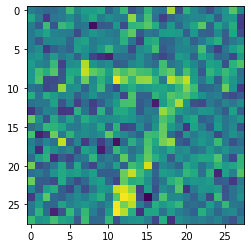

In [ ]:
plt.imshow(X_test_noisy[0].reshape((28,28)))

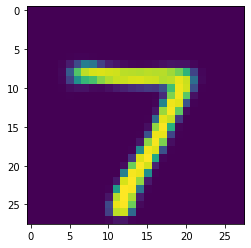

In [ ]:
plt.imshow(autoencoder.predict(X_test_noisy)[0].reshape((28,28)))

Otokodlayıcı modelimiz başarılı bir şekilde resimdeki gürültüyü kaldırıp, 7 sayısını net görünür bir hale getirmiştir.